1. Import Data & Python Packages

1.1 Python Packages ประกอบด้วย

1.NumPy  
2.Pandas  
3.Matplotlib  
4.Seaborn

In [2]:
!pip install "pandas>=2.0.0"
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


1.2 Import data 'arabica_coffee_full_table.csv' ที่ได้มาจาก Kaggle: https://www.kaggle.com/datasets/erwinhmtang/coffee-quality-institute-reviews-may2023?select=arabica_coffee_certification_information.csv โดยมีข้อมูลทั้งหมด 1509 entries และ ทั้งหมด 42 column ทั้งหมดจะเป็นข้อมูลที่ทางบริษัทผลิตเมล็ดกาแฟต่างๆ ส่งตัวอย่างเมล็ดกาแฟที่ผ่านกระบวนการแปรรูปแล้วมาทำการ Test เพี่อขอใบ Certificate สำหรับแสดงในฉลากผลิตภัณฑ์

In [3]:
df_arabica = pd.read_csv('arabica_coffee_full_table.csv')

# Preview
df_arabica.info(verbose=True, show_counts=True)
display(df_arabica.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   coffee_id              1509 non-null   object 
 1   Country_of_Origin      1508 non-null   object 
 2   Farm_Name              1151 non-null   object 
 3   Lot_Number             467 non-null    object 
 4   Mill                   1196 non-null   object 
 5   ICO_Number             1230 non-null   object 
 6   Company                1300 non-null   object 
 7   Altitude               1279 non-null   float64
 8   Region                 1450 non-null   object 
 9   Producer               1278 non-null   object 
 10  Number_of_Bags         1509 non-null   int64  
 11  Bag_Weight             1509 non-null   object 
 12  In_Country_Partner     1509 non-null   object 
 13  Harvest_Year           1462 non-null   object 
 14  Grading_Date           1509 non-null   object 
 15  Owne

,coffee_id,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,Region,Producer,...,Color,Category_One_Defects,Category_Two_Defects,Quakers,Expiration,Certification_Body,Certification_Address,Certification_Contact,parsed_expiration,parsed_grading_date
0,#647123,Guatemala,san francisco cotzal,11/441/50,"inmobiliaria e inversiones dos mil, s.a.",11/441/50,"inmobiliaria e inversiones dos mil, s.a.",1600.0,quiche,san francisco cotzal,...,Green,0,1,3.0,June 22 2023,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2023-06-22,2022-06-22
1,#927000,Guatemala,San jose del lago,11/15/95,San jose del lago,11/15/95,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,2,1.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
2,#902618,Guatemala,varias fincas,11/15/51,El Trèbol/Lìnea Gourmet,11/15/51,"Peter Schoenfeld, S.A.",1550.0,Oriente Santa rosa,varios productores,...,Green,0,2,1.0,March 21 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-03-21,2023-03-22
3,#781706,Guatemala,San jose del lago,11/15/96,San jose del lago,11/15/96,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,1,0.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
4,#237025,Guatemala,Finca Alta Luz,11-63-657,NaN,11-63-657,"Retrillas del pacifico, s.a.",1350.0,Huehuetenango,Maria de los Angeles Perez,...,Green,0,5,1.0,April 25 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-25,2023-04-26


2.Questioning and hypothesis  
2.1 คำถาม : คุณภาพกาแฟอาราบิก้าที่ดีที่สุดอยู่ประเทศอะไร และต่างกันเพราะอะไร?

สมมุติฐาน : ประเทศที่มีคุณภาพกาแฟที่ดีที่สุดน่าจะเป็นประเทศเอธิโอเปีย เนื่องจากเป็นประเทศที่มีชื่อเสียงเรื่องกาแฟอาราบิก้า และความแตกต่างของคุณภาพส่วนใหญ่อาจมาจากระดับความสูงของแหล่งที่เพาะปลูก เพราะการปลูกกาแฟอาราบิก้าควรปลูกบนพื้นที่ที่สูงตั้งแต่ 800-1,000 เมตรขึ้นไปเหนือระดับน้ำทะเล ยิ่งถ้าสูง 1,000 เมตรขึ้นไปจะยิ่งดีมาก


2.1.1 เริ่มจากการเลือก column ของข้อมูลที่ต้องการใช้จาก data

In [4]:
# Filter and sort the DataFrame
df_arabica1 = df_arabica.loc[:, ['Country_of_Origin','coffee_id' , 'Harvest_Year', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Overall','Total_Cup_Points', 'Moisture', 'Altitude']]
df_arabica1

,Country_of_Origin,coffee_id,Harvest_Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Overall,Total_Cup_Points,Moisture,Altitude
0,Guatemala,#647123,2021 / 2022,7.83,7.92,7.75,8.00,7.75,7.75,10.0,10.0,10.0,7.92,84.92,0.117,1600.0
1,Guatemala,#927000,2022 / 2023,7.58,7.83,7.58,7.75,7.67,7.75,10.0,10.0,10.0,7.75,83.92,0.100,1600.0
2,Guatemala,#902618,2022 / 2023,7.67,7.83,7.67,7.83,7.75,7.67,10.0,10.0,10.0,7.67,84.08,0.110,1550.0
3,Guatemala,#781706,2022 / 2023,7.58,7.92,7.67,7.75,7.83,7.75,10.0,10.0,10.0,7.75,84.25,0.100,1600.0
4,Guatemala,#237025,2022 / 2023,7.67,7.83,7.75,7.75,7.83,7.75,10.0,10.0,10.0,7.75,84.33,0.092,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,Ethiopia,#241548,2021 / 2022,7.67,8.17,8.00,8.33,8.00,8.00,10.0,10.0,10.0,8.00,86.17,0.116,1950.0
1505,Ethiopia,#510790,2021 / 2022,7.83,7.75,7.58,7.92,8.00,7.50,10.0,10.0,10.0,7.75,84.33,0.110,2361.0
1506,Ethiopia,#611011,2021 / 2022,8.00,8.08,8.00,8.00,7.67,7.75,10.0,10.0,10.0,7.83,85.33,0.123,2250.0
1507,Ethiopia,#917098,2021 / 2022,7.67,7.83,7.83,8.00,8.00,8.00,10.0,10.0,10.0,8.00,85.33,0.099,1950.0


2.1.2 พิจารณาอันดับคะแนนที่มากที่สุดของแต่ละประเทศจาก Total_Cup_Points (คะแนนรวมที่บ่งบอกคุณภาพของกาแฟ) โดยเรียงประเทศที่ได้คะแนนจากมากไปน้อย

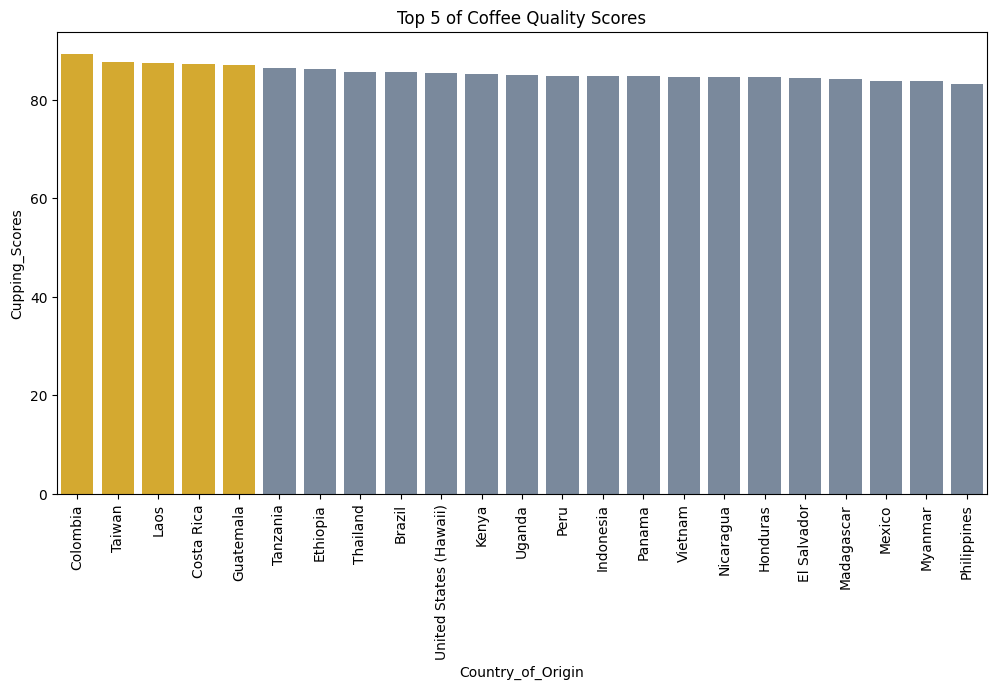

In [5]:
# find max of Total Cup Points
selected_years = ['2021','2022','2023','2021 / 2022','2022 / 2023']
df_arabica2 = df_arabica1[df_arabica1['Harvest_Year'].isin(selected_years)].copy()
df_group = df_arabica2.groupby('coffee_id').max().sort_values(by='Total_Cup_Points', ascending=False).drop_duplicates(['Country_of_Origin'])
df_group = df_group.reset_index(drop=True)
df_scores_max = df_group.groupby('Country_of_Origin')['Total_Cup_Points'].max().reset_index()
df_scores_max['Country_of_Origin'] = df_scores_max['Country_of_Origin'].replace('Tanzania, United Republic Of', 'Tanzania') #rename

# sorted values of max scores
df_sorted = df_scores_max.sort_values('Total_Cup_Points', ascending=False)

# colors
colors = ['#7489a2'] * len(df_sorted)

# colors of top 5
colors[:5] = ['#efb615'] * 5

# barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country_of_Origin', y='Total_Cup_Points', palette=colors, data=df_sorted)
plt.xticks(rotation=90)
plt.xlabel('Country_of_Origin')
plt.ylabel('Cupping_Scores')
plt.title('Top 5 of Coffee Quality Scores')

# plot
plt.show()

2.1.3 พิจารณาความสูงของแหล่งเพาะปลูกมีผลกับคะแนนของคุณภาพกาแฟไหม

2.1.3.1 พิจารณาจากคะแนนในแต่ละส่วนของ Cupping score, ค่า Moisture(ความชุ่มชื้นของเมล็ด) และ Altitude(ระดับความสูง) โดยเริ่มจากการเลือกข้อมูลที่ต้องการนำมาใช้วิเคราะห์

In [6]:
df_select = df_arabica.loc[:, ['coffee_id', 'Country_of_Origin', 'Harvest_Year', 'Total_Cup_Points', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Overall', 'Moisture', 'Altitude']]
selected_years = ['2021','2022','2023','2021 / 2022','2022 / 2023']
df_arabica3 = df_select[df_select['Harvest_Year'].isin(selected_years)].copy()
df_group = df_arabica3.groupby('coffee_id').max().sort_values(by='Total_Cup_Points', ascending=False).drop_duplicates(['Country_of_Origin'])
df_group = df_group.reset_index(drop=True)
df_sorted = df_group.head(5)
df_sorted =  df_sorted.set_index('Country_of_Origin')
df_sorted

,Harvest_Year,Total_Cup_Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Overall,Moisture,Altitude
Country_of_Origin,,,,,,,,,,,,,,
Colombia,2021 / 2022,89.33,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.118,1815.0
Taiwan,2021 / 2022,87.58,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.105,1200.0
Laos,2021 / 2022,87.42,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.104,1300.0
Costa Rica,2022,87.17,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.118,1900.0
Guatemala,2022,87.00,8.33,8.33,8.25,7.83,7.83,8.17,10.0,10.0,10.0,8.25,0.107,1668.0


2.1.3.2 พิจารณาจากคะแนนในแต่ละส่วนของ Cupping score ของ 3 ประเทศ

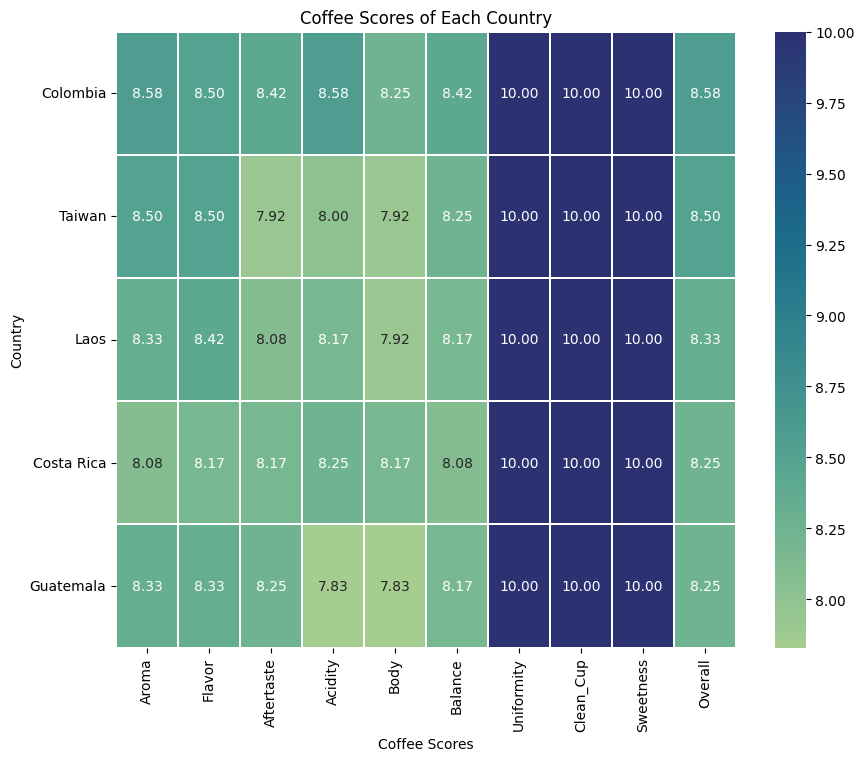

In [7]:
df_select = df_arabica.loc[:, ['coffee_id', 'Country_of_Origin', 'Harvest_Year', 'Total_Cup_Points', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Overall', 'Moisture', 'Altitude']]
selected_years = ['2021','2022','2023','2021 / 2022','2022 / 2023']
df_arabica3 = df_select[df_select['Harvest_Year'].isin(selected_years)].copy()
df_group = df_arabica3.groupby('coffee_id').max().sort_values(by='Total_Cup_Points', ascending=False).drop_duplicates(['Country_of_Origin'])
df_group = df_group.reset_index(drop=True)
df_sorted = df_group.head(5)
df_sorted =  df_sorted.set_index('Country_of_Origin')
df_sorted1 = df_sorted.loc[ : , ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean_Cup','Sweetness','Overall'] ]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_sorted1, annot=True, cmap='crest', fmt='.2f', linewidth=0.1)

# Set the title and labels
plt.title('Coffee Scores of Each Country')
plt.xlabel('Coffee Scores')
plt.ylabel('Country')
plt.tick_params(axis='y', rotation=0)

# Show the plot
plt.show()

2.1.3.3 พิจารณาค่า Moisture ของ 5 ประเทศที่มีอันดับคะแนน Cupping score สูงสุด

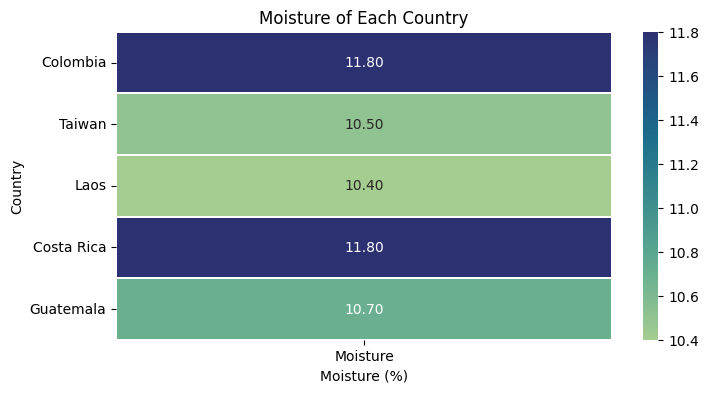

In [8]:
df_select = df_arabica.loc[:, ['coffee_id', 'Country_of_Origin', 'Harvest_Year', 'Total_Cup_Points', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Overall', 'Moisture', 'Altitude']]
selected_years = ['2021','2022','2023','2021 / 2022','2022 / 2023']
df_arabica3 = df_select[df_select['Harvest_Year'].isin(selected_years)].copy()
df_group = df_arabica3.groupby('coffee_id').max().sort_values(by='Total_Cup_Points', ascending=False).drop_duplicates(['Country_of_Origin'])
df_group = df_group.reset_index(drop=True)
df_sorted = df_group.head(5)
df_sorted =  df_sorted.set_index('Country_of_Origin')
df_sorted2 = df_sorted.loc[ : , ['Moisture'] ]

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_sorted2*100, annot=True, cmap='crest', fmt='.2f', linewidth=0.1)

# Set the title and labels
plt.title('Moisture of Each Country')
plt.xlabel('Moisture (%)')
plt.ylabel('Country')
plt.tick_params(axis='y', rotation=0)

# Show the plot
plt.show()

2.1.3.4 พิจารณาค่า Altitude ของ 5 ประเทศที่มีอันดับคะแนน Cupping score สูงสุด

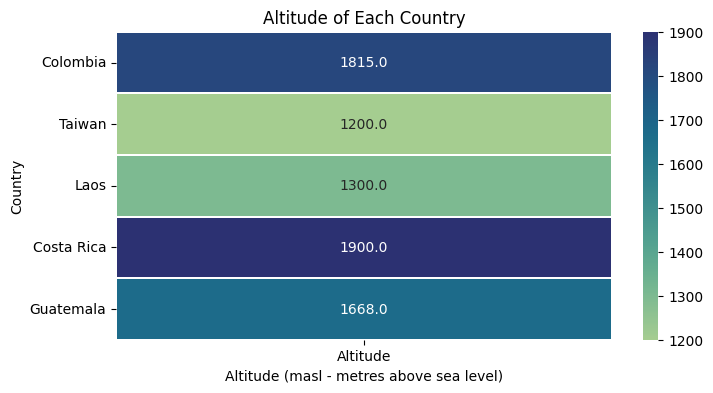

In [9]:
df_select = df_arabica.loc[:, ['coffee_id', 'Country_of_Origin', 'Harvest_Year', 'Total_Cup_Points', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Overall', 'Moisture', 'Altitude']]
selected_years = ['2021','2022','2023','2021 / 2022','2022 / 2023']
df_arabica3 = df_select[df_select['Harvest_Year'].isin(selected_years)].copy()
df_group = df_arabica3.groupby('coffee_id').max().sort_values(by='Total_Cup_Points', ascending=False).drop_duplicates(['Country_of_Origin'])
df_group = df_group.reset_index(drop=True)
df_sorted = df_group.head(5)
df_sorted =  df_sorted.set_index('Country_of_Origin')
df_sorted3 = df_sorted.loc[ : , ['Altitude'] ]

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_sorted3, annot=True, cmap='crest', fmt='.1f', linewidth=0.1)

# Set the title and labels
plt.title('Altitude of Each Country')
plt.xlabel('Altitude (masl - metres above sea level)')
plt.ylabel('Country')
plt.tick_params(axis='y', rotation=0)

# Show the plot
plt.show()

2.2 กาแฟอาราบิก้าสายพันธุ์ใดในแต่ละประเทศที่ได้รับความนิยมปลูกสูงสุด

สมมติฐาน : แต่ละประเทศน่าจะมีอาราบิก้าสายพันธุ์ที่นิยมปลูกแตกต่างกัน

2.2.1 พิจารณาจาก 5 ประเทศที่มีอันดับสูงสุดว่าปลูกอาราบิก้าสายพันธุ์ใดมากสุด โดยหาจากจำนวนของTotal(Ton)(น้ำหนักทั้งหมด)
จากการนำ Number_of_Bags(จำนวนของถุง) คูณกับ Bag_Weight(น้ำหนักของถุง) ในช่วงปี 2021-2023 เพื่อให้ได้สายพันธุ์ที่มีน้ำหนักทั้งหมดที่มากที่สุดของแต่ละประเทศ

In [10]:
#find variety of each country
df_variety = df_arabica.loc[ : , ['Country_of_Origin','Harvest_Year','Variety','Number_of_Bags','Bag_Weight','Processing_Method'] ]

df_variety['Bag_Weight'] = df_variety['Bag_Weight'].str.extract('(\d+)', expand=False).astype(int)

# selected 2021-2023 years
selected_years = ['2021','2022','2023','2021 / 2022','2022 / 2023']
df_variety_filtered = df_variety[df_variety['Harvest_Year'].isin(selected_years)].copy()

#calculate to find total weight
df_variety_filtered.loc[:, 'Total(Ton)'] = ((df_variety_filtered['Number_of_Bags'] * df_variety_filtered['Bag_Weight']) / 1000).round(2)

#select column
df_variety_filtered = df_variety_filtered.loc[ : , ['Country_of_Origin','Variety','Total(Ton)']]
df_variety_sum = df_variety_filtered.groupby(['Country_of_Origin', 'Variety']).sum()
df_variety_pivot = df_variety_sum.pivot_table(index='Country_of_Origin', columns='Variety', values='Total(Ton)', aggfunc='sum').fillna(0)

#pivot variety
df_variety_pivot = df_variety_pivot.loc[  ['Colombia','Taiwan','Laos', 'Costa Rica','Guatemala'] , : ]
df_variety_max = df_variety_pivot.loc[['Colombia','Taiwan','Laos', 'Costa Rica','Guatemala'], :].idxmax(axis=1)

countries = ['Colombia','Taiwan','Laos', 'Costa Rica','Guatemala']
df_variety_max = df_variety_pivot.loc[countries].idxmax(axis=1)
df_variety_max = pd.DataFrame(df_variety_max, columns=['Maximum Variety'])

df_variety_max

,Maximum Variety
Country_of_Origin,
Colombia,Caturra
Taiwan,Gesha
Laos,Catimor
Costa Rica,Caturra
Guatemala,Caturra


2.3 เมล็ดกาแฟ Caturra จากประเทศโคลัมเบีย (Colombia)ที่ผลิตมากที่สุดใช้กระบวนการผลิตแบบไหนที่ทำให้ได้คะแนนสูงที่สุด

สมมติฐาน : คาดว่าเป็นแบบ Natural / Dry เพื่อให้ได้กลิ่นและรสชาติตาม Nature ของกาแฟ

2.3.1 พิจารณาจากประเทศโคลัมเบีย (Colombia) ที่เป็นเมล็ดกาแฟสายพันธุ์ Caturra และหาจากคะแนนรวมของ Cupping score สูงสุดของแต่ละ processing mathod โดยเรียงคะแนนจากมากไปน้อย

In [11]:
df_variety = df_arabica.loc[ : , ['Country_of_Origin','Variety','Processing_Method','Total_Cup_Points'] ]
df_colombia = df_variety[(df_variety['Country_of_Origin'] == 'Colombia') & (df_variety['Variety'] == 'Caturra')]
df_colombia_sorted = df_colombia.sort_values('Total_Cup_Points', ascending=False)
df_colombia_sorted

,Country_of_Origin,Variety,Processing_Method,Total_Cup_Points
1395,Colombia,Caturra,Washed / Wet,86.17
66,Colombia,Caturra,Washed / Wet,86.00
810,Colombia,Caturra,Washed / Wet,85.92
787,Colombia,Caturra,Washed / Wet,85.25
836,Colombia,Caturra,Natural / Dry,85.25
...,...,...,...,...
760,Colombia,Caturra,Washed / Wet,81.33
706,Colombia,Caturra,Washed / Wet,81.00
837,Colombia,Caturra,Natural / Dry,80.67
809,Colombia,Caturra,Washed / Wet,79.50


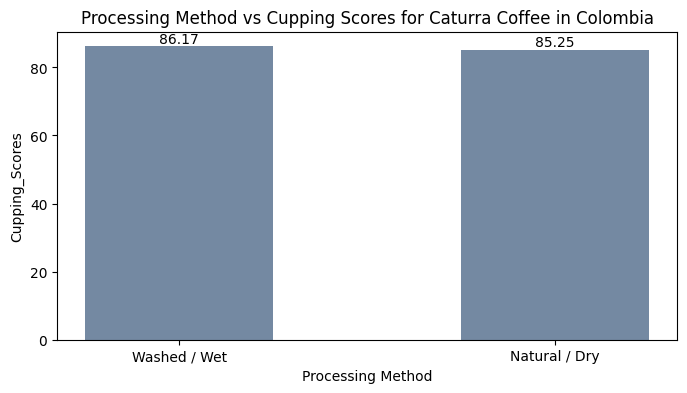

In [12]:
# Group the data by processing method
df_colombia_grouped = df_colombia_sorted.groupby('Processing_Method')['Total_Cup_Points'].max().reset_index()

# Sort the data by total cup points
df_colombia_grouped = df_colombia_grouped.sort_values('Total_Cup_Points', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(df_colombia_grouped['Processing_Method'], df_colombia_grouped['Total_Cup_Points'], color=['#7489a2'], width=0.5)
plt.xlabel('Processing Method')
plt.ylabel('Cupping_Scores')
plt.title('Processing Method vs Cupping Scores for Caturra Coffee in Colombia')
plt.xticks(rotation=0)

for i, value in enumerate(df_colombia_grouped['Total_Cup_Points']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Display
plt.show()

2.3.2 พิจารณาจากประเทศไต้หวัน (Taiwan) ที่เป็นเมล็ดกาแฟสายพันธุ์ Gesha และหาจากคะแนนรวมของ Cupping score สูงสุดของแต่ละ processing mathod โดยเรียงคะแนนจากมากไปน้อย

In [13]:
df_variety = df_arabica.loc[ : , ['Country_of_Origin','Variety','Processing_Method','Total_Cup_Points'] ]
df_taiwan = df_variety[(df_variety['Country_of_Origin'] == 'Taiwan') & (df_variety['Variety'] == 'Gesha')]
df_taiwan_sorted = df_taiwan.sort_values('Total_Cup_Points', ascending=False)
df_taiwan_sorted

,Country_of_Origin,Variety,Processing_Method,Total_Cup_Points
1435,Taiwan,Gesha,Washed / Wet,87.58
1428,Taiwan,Gesha,Washed / Wet,86.92
1391,Taiwan,Gesha,Washed / Wet,86.25
35,Taiwan,Gesha,Natural / Dry,86.08
37,Taiwan,Gesha,Natural / Dry,85.92
1432,Taiwan,Gesha,Natural / Dry,85.50
1417,Taiwan,Gesha,Natural / Dry,85.50
1412,Taiwan,Gesha,Natural / Dry,85.50
1436,Taiwan,Gesha,Washed / Wet,85.33
1411,Taiwan,Gesha,Washed / Wet,85.25


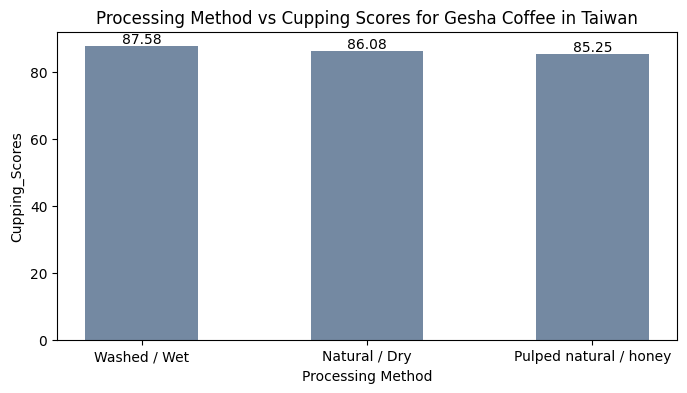

In [14]:
# Group the data by processing method
df_taiwan_grouped = df_taiwan_sorted.groupby('Processing_Method')['Total_Cup_Points'].max().reset_index()

# Sort the data by total cup points
df_taiwan_grouped = df_taiwan_grouped.sort_values('Total_Cup_Points', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(df_taiwan_grouped['Processing_Method'], df_taiwan_grouped['Total_Cup_Points'], color=['#7489a2'], width=0.5)
plt.xlabel('Processing Method')
plt.ylabel('Cupping_Scores')
plt.title('Processing Method vs Cupping Scores for Gesha Coffee in Taiwan')
plt.xticks(rotation=0)

for i, value in enumerate(df_taiwan_grouped['Total_Cup_Points']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Display
plt.show()

2.3.3 พิจารณาจากประเทศลาว (Laos) ที่เป็นเมล็ดกาแฟสายพันธุ์ Catimor และหาจากคะแนนรวมของ Cupping score สูงสุดของแต่ละ processing mathod โดยเรียงคะแนนจากมากไปน้อย

In [15]:
df_variety = df_arabica.loc[ : , ['Country_of_Origin','Variety','Processing_Method','Total_Cup_Points'] ]
df_laos = df_variety[(df_variety['Country_of_Origin'] == 'Laos') & (df_variety['Variety'] == 'Catimor')]
df_laos_sorted = df_laos.sort_values('Total_Cup_Points', ascending=False)
df_laos_sorted

,Country_of_Origin,Variety,Processing_Method,Total_Cup_Points
1508,Laos,Catimor,Natural / Dry,83.08
1344,Laos,Catimor,Washed / Wet,82.67
1323,Laos,Catimor,Washed / Wet,80.83
1475,Laos,Catimor,Washed / Wet,79.67


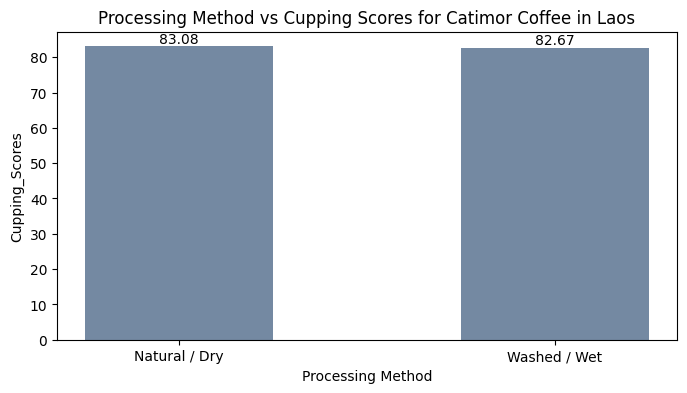

In [16]:
# Group the data by processing method
df_laos_grouped = df_laos_sorted.groupby('Processing_Method')['Total_Cup_Points'].max().reset_index()

# Sort the data by total cup points
df_laos_grouped = df_laos_grouped.sort_values('Total_Cup_Points', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(df_laos_grouped['Processing_Method'], df_laos_grouped['Total_Cup_Points'], color=['#7489a2'], width=0.5)
plt.xlabel('Processing Method')
plt.ylabel('Cupping_Scores')
plt.title('Processing Method vs Cupping Scores for Catimor Coffee in Laos')
plt.xticks(rotation=0)

for i, value in enumerate(df_laos_grouped['Total_Cup_Points']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Display
plt.show()

2.3.4 พิจารณาจากประเทศคอสตาริกา (Costa Rica) ที่เป็นเมล็ดกาแฟสายพันธุ์ Caturra และหาจากคะแนนรวมของ Cupping score สูงสุดของแต่ละ processing mathod โดยเรียงคะแนนจากมากไปน้อย

In [17]:
df_variety = df_arabica.loc[ : , ['Country_of_Origin','Variety','Processing_Method','Total_Cup_Points'] ]
df_costa = df_variety[(df_variety['Country_of_Origin'] == 'Costa Rica') & (df_variety['Variety'] == 'Caturra')]
df_costa_sorted = df_costa.sort_values('Total_Cup_Points', ascending=False)
df_costa_sorted.head(5)

,Country_of_Origin,Variety,Processing_Method,Total_Cup_Points
213,Costa Rica,Caturra,Washed / Wet,87.17
631,Costa Rica,Caturra,Washed / Wet,86.33
220,Costa Rica,Caturra,Washed / Wet,85.33
216,Costa Rica,Caturra,Washed / Wet,85.33
44,Costa Rica,Caturra,Washed / Wet,84.67


2.3.5 พิจารณาจากประเทศกัวเตมาลา (Guatemala) ที่เป็นเมล็ดกาแฟสายพันธุ์ Caturra และหาจากคะแนนรวมของ Cupping score สูงสุดของแต่ละ processing mathod โดยเรียงคะแนนจากมากไปน้อย

In [18]:
df_variety = df_arabica.loc[ : , ['Country_of_Origin','Variety','Processing_Method','Total_Cup_Points'] ]
df_guatemala = df_variety[(df_variety['Country_of_Origin'] == 'Guatemala') & (df_variety['Variety'] == 'Caturra')]
df_guatemala_sorted = df_guatemala.sort_values('Total_Cup_Points', ascending=False)
df_guatemala_sorted

,Country_of_Origin,Variety,Processing_Method,Total_Cup_Points
208,Guatemala,Caturra,Washed / Wet,85.17
8,Guatemala,Caturra,Washed / Wet,85.00
0,Guatemala,Caturra,Washed / Wet,84.92
7,Guatemala,Caturra,Washed / Wet,84.67
882,Guatemala,Caturra,Washed / Wet,84.25
877,Guatemala,Caturra,Washed / Wet,84.25
846,Guatemala,Caturra,Washed / Wet,84.17
894,Guatemala,Caturra,Washed / Wet,84.17
2,Guatemala,Caturra,Washed / Wet,84.08
5,Guatemala,Caturra,Washed / Wet,84.00


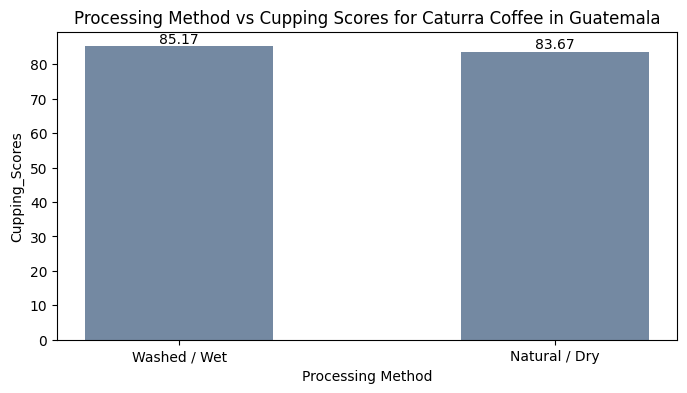

In [19]:
# Group the data by processing method
df_guatemala_grouped = df_guatemala_sorted.groupby('Processing_Method')['Total_Cup_Points'].max().reset_index()

# Sort the data by total cup points
df_guatemala_grouped = df_guatemala_grouped.sort_values('Total_Cup_Points', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(df_guatemala_grouped['Processing_Method'], df_guatemala_grouped['Total_Cup_Points'], color=['#7489a2'], width=0.5)
plt.xlabel('Processing Method')
plt.ylabel('Cupping_Scores')
plt.title('Processing Method vs Cupping Scores for Caturra Coffee in Guatemala')
plt.xticks(rotation=0)

for i, value in enumerate(df_guatemala_grouped['Total_Cup_Points']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Display
plt.show()

2.4 คำถาม : กระบวนการแปรรูปเมล็ดกาแฟรูปแบบต่าง ๆ   มีผลต่อคะแนนรสสัมผัสและคุณภาพของกาแฟมากไหม  
  
สมมุติฐาน : มีผลค่อนข้างมาก


2.4.1 เริ่มจากการ clean data โดยการดูจำนวนของชุดข้อมูลของ Processing Methods(กระบวนการแปรรูป) กลุ่มต่างๆ ที่มีจำนวนข้อมูลน้อยมากๆ ออกไป เนื่องจากอาจทำให้ผลลัพธ์ที่ได้คลาดเคลื่อน ดังกราฟ 'Count of Process Methods

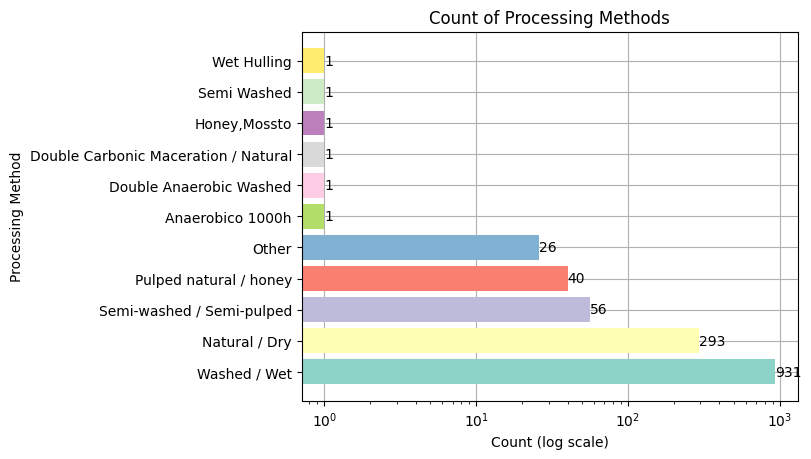

In [35]:
df2 = df_arabica.loc[:, ['Processing_Method']]
grouped = df_arabica.groupby('Processing_Method').size().sort_values(ascending=False)

# Define the colors for the bar graph
num_methods = len(grouped)
colors = plt.cm.Set3(np.linspace(0, 1, num_methods))
plt.barh(grouped.index, grouped.values, color=colors)
plt.xscale('log')

for i, v in enumerate(grouped.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.xlabel('Count (log scale)')
plt.ylabel('Processing Method')
plt.title('Count of Processing Methods')
plt.grid(True)  # Add grid
plt.gca().set_axisbelow(True)  # Place grid on the background
plt.show()

2.4.2 พิจารณาอันดับ Processing Methods ที่ได้ค่าเฉลี่ย Total Cup points(คะแนนรวมที่บ่งบอกคุณภาพของกาแฟ)

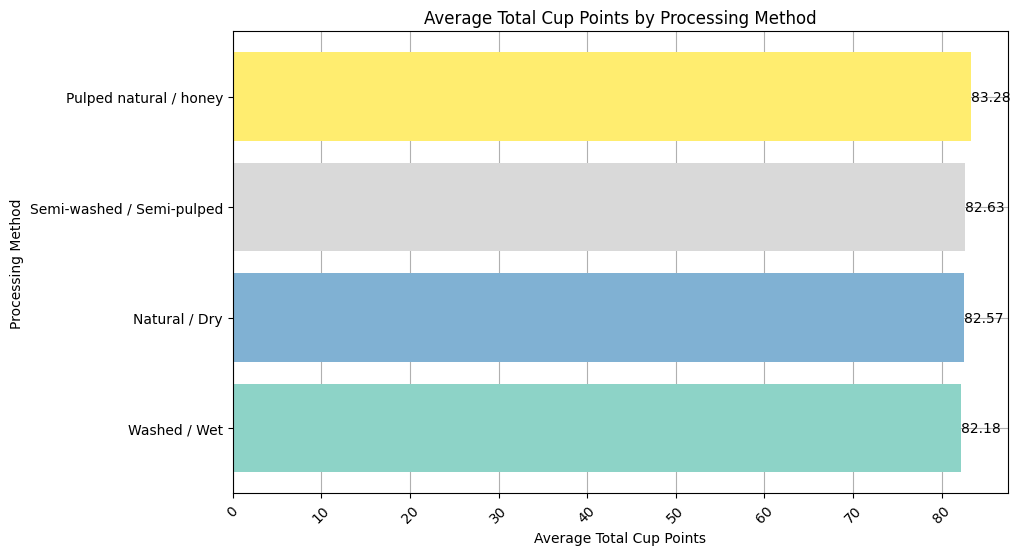

In [36]:
df3 = df_arabica.loc[ : , ['Processing_Method','Total_Cup_Points'] ]
filtered_df3 = df3[~(df3.groupby('Processing_Method').Processing_Method.transform('count') == 1)]
filtered_df3 = filtered_df3[filtered_df3['Processing_Method'] != 'Other']
df4 = filtered_df3
df4_grouped = df4.groupby('Processing_Method').mean()
df4_grouped = df4_grouped.sort_values(by='Total_Cup_Points')


# Generate unique colors for each processing method
num_methods = len(df4_grouped)
colors = plt.cm.Set3(np.linspace(0, 1, num_methods))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(df4_grouped.index, df4_grouped['Total_Cup_Points'], color=colors)

# Add the value labels to each bar
for i, value in enumerate(df4_grouped['Total_Cup_Points']):
    plt.text(value, i, f'{value:.2f}', va='center')

# Customize the plot
plt.xlabel('Average Total Cup Points')
plt.ylabel('Processing Method')
plt.title('Average Total Cup Points by Processing Method')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid
plt.gca().set_axisbelow(True)  # Place grid on the background

# Show the plot
plt.show()

2.4.3 พิจารณา Procesing methods แต่ละแบบ มีคะแนนรสสัมผัสแตกต่างกันในมิติไหนอย่างไร

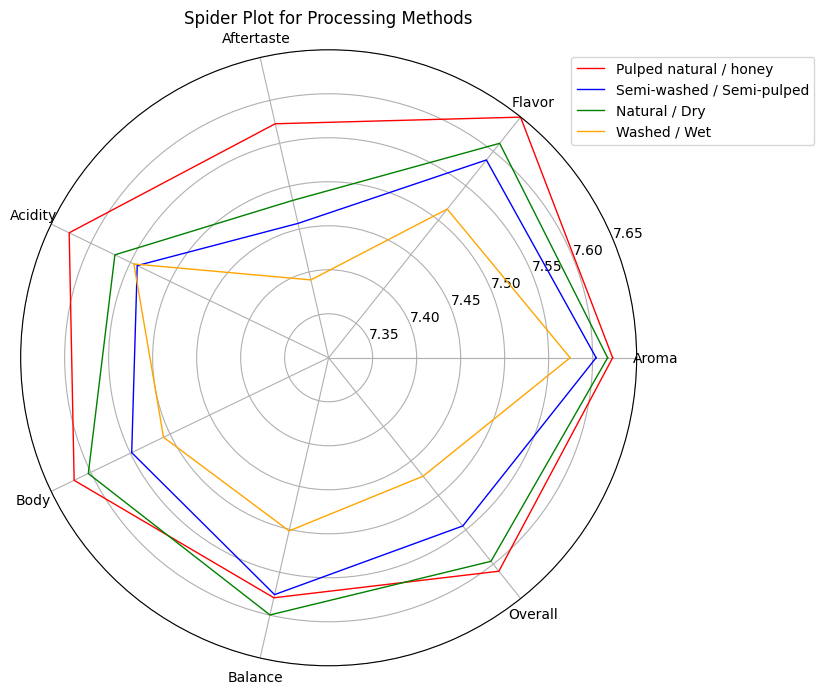

In [49]:
df5 = df_arabica.loc[ : , ['Processing_Method','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean_Cup','Sweetness','Overall','Total_Cup_Points'] ]
filtered_df1 = df5[~(df5.groupby('Processing_Method').Processing_Method.transform('count') == 1)]
filtered_df1 = filtered_df1[filtered_df1['Processing_Method'] != 'Other']

grouped_df5 = filtered_df1.groupby('Processing_Method').mean().sort_values(by='Total_Cup_Points',ascending=False)
grouped_df5

# Define the attributes
attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Overall']

filtered_df = grouped_df5

processing_methods = grouped_df5.index

# Define the values for the spider plot
values = filtered_df.loc[:, attributes].values.tolist()
values = [row + [row[0]] for row in values]  # Repeat the first value to close the plot for each row

# Define the angles for each attribute
angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
angles += angles[:1]  # Repeat the first angle to close the plot

# Define the colors for the spider plot
colors = ['red', 'blue', 'green','orange','pink']  # Specify your desired colors here

# Create the spider plot
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'polar': True})

# Iterate over each row of values and plot a spider plot with custom line color
for row, color in zip(values, colors):
    ax.plot(angles, row, linewidth=1, linestyle='solid', color=color)

# Set the labels for each attribute
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.legend(labels=processing_methods, loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set_ylim(7.3,7.65)
# Set the title of the plot
ax.set_title('Spider Plot for Processing Methods')



# Display the plot
plt.show()

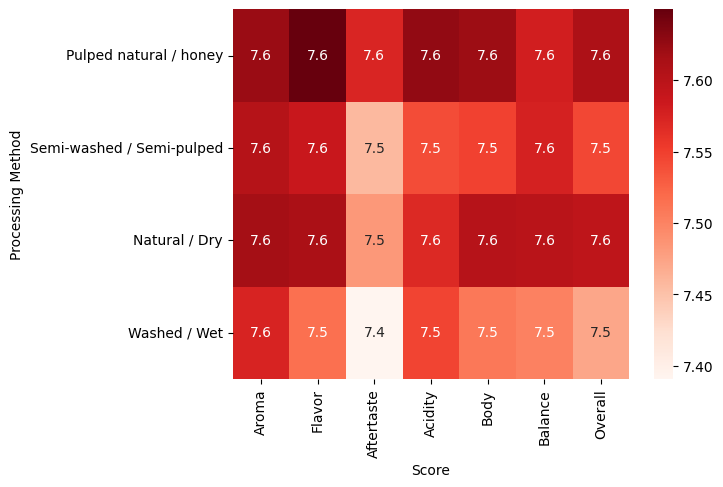

In [23]:
grouped_df6 = grouped_df5.loc[ : , ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Overall'] ]
sns.heatmap(grouped_df6, annot=True, cmap='Reds')
plt.xlabel('Score')
plt.ylabel('Processing Method')

plt.show()

2.4.4 พิจารณาโอกาสที่แต่ละ Procesing methods จะสามารถมีคะแนนที่สูงพอที่จะผ่านเป็น Specialty coffee(คือ กาแฟพิเศษ ที่วัดผลตั้งแต่เมล็ดกาแฟจนถึง Process ทุกอย่าง ที่ได้ Total cup points ตั้งแต่ 80 คะแนนเป็นต้นไป) มากน้อยแค่ไหน

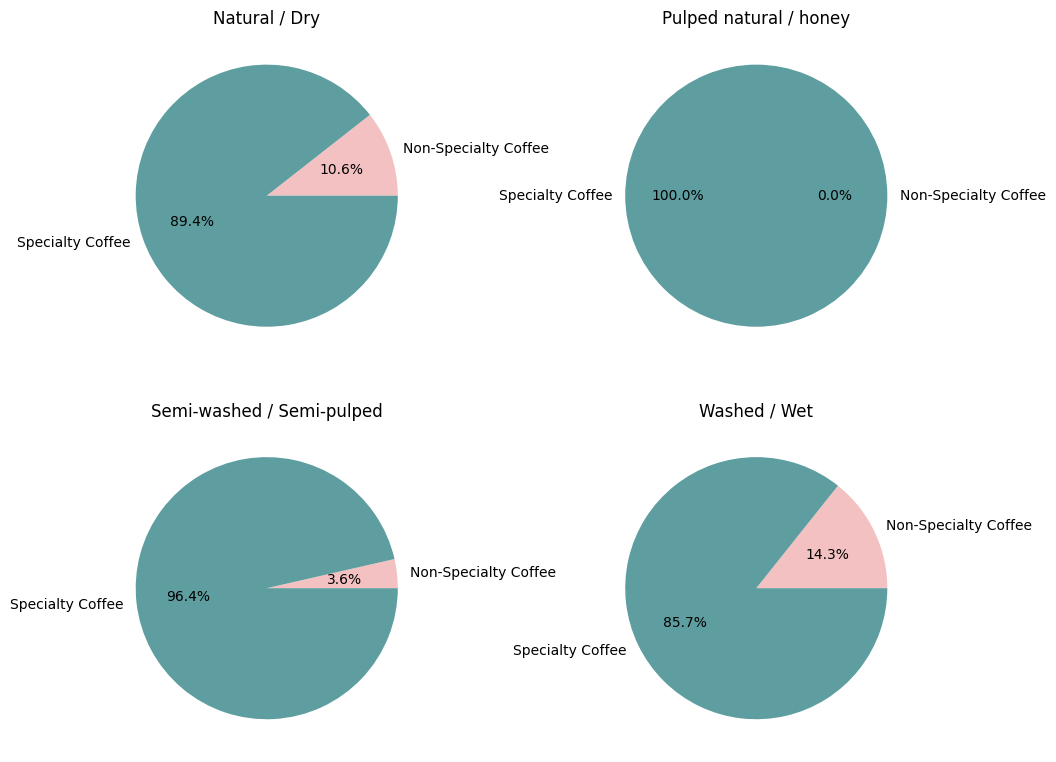

In [24]:
df6 = df_arabica.loc[ : , ['Processing_Method','Total_Cup_Points'] ]
filtered_df6 = df6[~(df6.groupby('Processing_Method').Processing_Method.transform('count') == 1)].dropna(subset=['Processing_Method'])
filtered_df6 = filtered_df6[filtered_df6['Processing_Method'] != 'Other']

filtered_df7 = filtered_df6[filtered_df6['Total_Cup_Points'] >= 80]

grouped_df7 = filtered_df7.groupby('Processing_Method').agg({'Total_Cup_Points': 'count'}).reset_index()
grouped_df8 = grouped_df7.rename(columns={'Total_Cup_Points': 'Count of Specialty Coffee'})

grouped_df9 = filtered_df6[filtered_df6['Total_Cup_Points'] < 80].groupby('Processing_Method').size().reset_index(name='Count of Non-Specialty Coffee')
new_row = {'Processing_Method': 'Pulped natural / honey', 'Count of Non-Specialty Coffee': 0}
grouped_df9 = grouped_df9._append(new_row, ignore_index=True)

merged_df = grouped_df8.merge(grouped_df9, on='Processing_Method', how='outer')
# Determine the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Define custom colors for the pie charts
colors = ['#F4C1C2', '#5F9EA0']

# Iterate over each row and create a pie chart in the corresponding subplot
for i, row in merged_df.iterrows():
    if i < num_rows * num_cols:
        labels = ['Non-Specialty Coffee', 'Specialty Coffee']
        values = [row['Count of Non-Specialty Coffee'], row['Count of Specialty Coffee']]

        # Determine the subplot coordinates for the current row
        row_index = i // num_cols
        col_index = i % num_cols

        # Create the pie chart for the current row in the corresponding subplot
        ax = axes[row_index, col_index]
        ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
        ax.set_title(row['Processing_Method'])
# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots as a single picture
plt.show()



2.5.1 เริ่มจาการ Clean data โดยเลือกเฉพาะข้อมูลที่ระบุปีที่เก็บเกี่ยวอยู่ระหว่างปี ค.ศ. 2021-2023 เพื่อให้ข้อมูลที่ได้มีความทันสมัยมากที่สุด มีชุดข้อมูลแต่ละ row ดังกราฟด้านล่าง

In [25]:
df7 = df_arabica.loc[ : , ['Country_of_Origin','Harvest_Year','Processing_Method','Number_of_Bags','Bag_Weight'] ]
df7['Bag_Weight'] = df7['Bag_Weight'].astype(str)
df7['Bag_Weight'] = df7['Bag_Weight'].str.extract('(\d+)', expand=False).astype(int)
df7['Total Weight(Ton)'] = ((df7['Number_of_Bags'] * df7['Bag_Weight']) / 1000).round(2)
df8 = df7.loc[ : , ['Country_of_Origin','Harvest_Year','Processing_Method','Total Weight(Ton)'] ]
df8_grouped = df8.groupby('Harvest_Year').size().reset_index(name='Count')
df8_grouped

,Harvest_Year,Count
0,08/09 crop,2
1,1T/2011,1
2,1t/2011,1
3,2009 - 2010,1
4,2009 / 2010,1
5,2009-2010,3
6,2009/2010,12
7,2010,10
8,2010-2011,6
9,2011,26


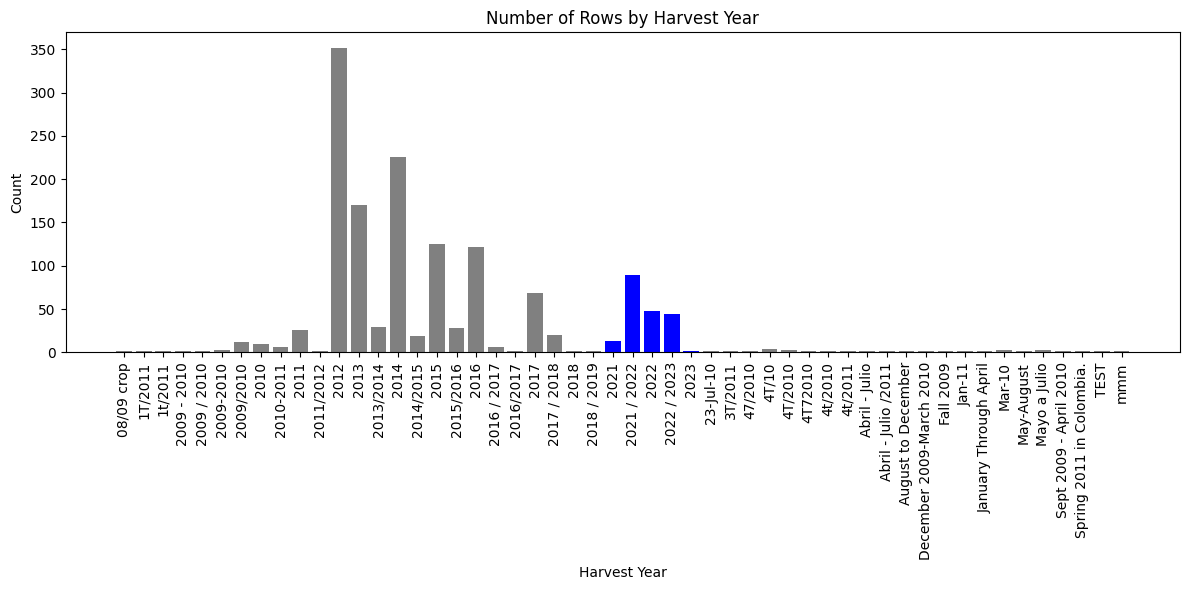

In [26]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Define a list of colors for highlighting
highlight_colors = ['blue' if year in ['2021', '2022', '2023', '2021 / 2022', '2022 / 2023'] else 'gray' for year in df8_grouped['Harvest_Year']]

# Plotting the bar chart with highlighted bars
plt.bar(df8_grouped['Harvest_Year'], df8_grouped['Count'], color=highlight_colors)

# Adding labels and title
plt.xlabel('Harvest Year')
plt.ylabel('Count')
plt.title('Number of Rows by Harvest Year')

# Rotating the x-axis labels if needed
plt.xticks(rotation=90)

# Adjusting the spacing between the bars
plt.tight_layout()

# Displaying the plot
plt.show()


2.5.2 พิจารณาปริมาณน้ำหนักกระสอบเมล็ดกาแฟที่ผ่านการแปรรูปในแต่ละประเทศ พบว่าส่วนใหญ่ในปัจจุบันใช้วิธีแปรรูปแบบ Washed / Wet มากถึง 18,574 ตัน ใน 3 ปีที่ผ่านมา และคิดเป็น 98.05% จากทั้งหมด ดังกราฟด้านล่าง

In [27]:
selected_years = ['2021','2022','2023','2021 / 2022','2022 / 2023']
filtered_df8 = df8[df8['Harvest_Year'].isin(selected_years)]
df9 = filtered_df8.loc[ : , ['Country_of_Origin','Processing_Method','Total Weight(Ton)'] ]
filtered_df9 = df9[~(df9.groupby('Processing_Method').Processing_Method.transform('count') == 1)]
grouped_df9 = filtered_df9.groupby('Processing_Method')['Total Weight(Ton)'].sum().reset_index()

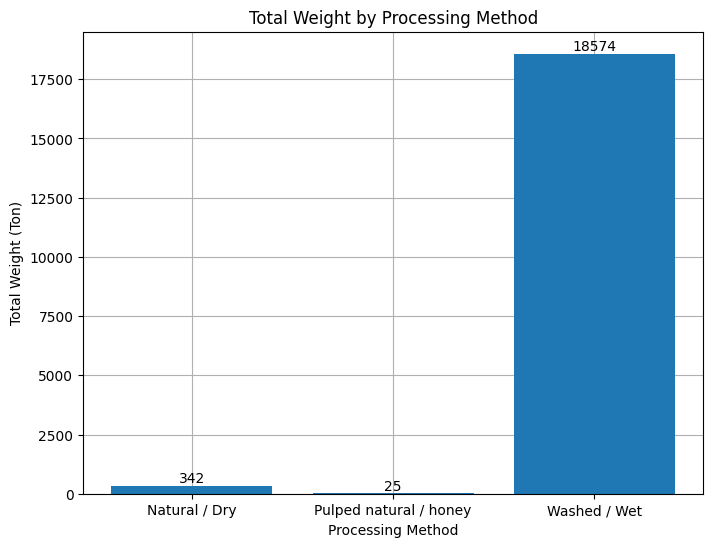

In [28]:
# Creating a figure with a specific size
plt.figure(figsize=(8, 6))

# Plotting the bar graph
plt.bar(grouped_df9['Processing_Method'], grouped_df9['Total Weight(Ton)'])

# Adding value labels to each bar
for i, value in enumerate(grouped_df9['Total Weight(Ton)']):
    plt.text(i, value, int(value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Processing Method')
plt.ylabel('Total Weight (Ton)')
plt.title('Total Weight by Processing Method')
plt.grid(True)  # Add grid
plt.gca().set_axisbelow(True)  # Place grid on the background

# Displaying the plot
plt.show()

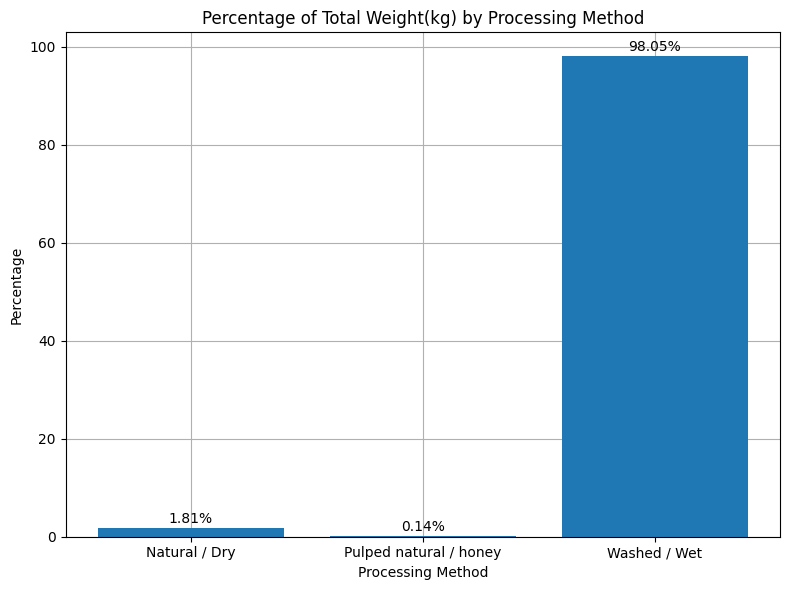

In [29]:
# Calculate the percentage of each 'Total Weight(kg)' within each group
grouped_df9['Percentage'] = grouped_df9['Total Weight(Ton)'] / grouped_df9['Total Weight(Ton)'].sum() * 100

# Sort the DataFrame by the 'Processing_Method' column
grouped_df9.sort_values('Processing_Method', inplace=True)

# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the width and height as desired

# Plot the stacked bar chart
plt.bar(grouped_df9['Processing_Method'], grouped_df9['Percentage'])

# Add labels and title to the plot
plt.xlabel('Processing Method')
plt.ylabel('Percentage')
plt.title('Percentage of Total Weight(kg) by Processing Method')

# Show the percentage value on top of each bar
for i, value in enumerate(grouped_df9['Percentage']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.grid(True)  # Add grid
plt.gca().set_axisbelow(True)  # Place grid on the background

# Display the plot
plt.tight_layout()
plt.show()
